### Introduction

Forest Cover Predictions  

- Dataset : https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset  
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

- Objective : Developed a prediction model to classify the forest cover type based on the land characteristics.

ADDITIONAL INFORMATION  

Name / Data Type / Measurement / Description

- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

### Import Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn .over_sampling import SMOTE
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import recall_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

### Loading Data

In [85]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [86]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


In [87]:
df[df.duplicated()]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


There are no duplication in dataset

In [88]:
df_copy = df.copy()

Base dataset copied

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Checking out the dataset type and missing value. This dataset consist of 55 numerical columns

In [90]:
df.isnull().sum() / df.shape[0]*100

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

There are no missing value indicated

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Looking for dataset distribution

In [92]:
# # splitting data into categoric and numeric with function
# def col_type (data):
#     '''function for detecting data type'''
#     num_cols = df.columns[df.dtypes != 'object'].tolist()
#     cat_cols = df.columns[df.dtypes == 'object'].tolist()
#     return num_cols, cat_cols

In [93]:
# num_cols = col_type (df)[0]
# cat_cols = col_type (df)[1]

# print(f'numerical columns :',num_cols)
# print(f'categorical columns :',cat_cols)

In [94]:
# splitting data into categoric and numeric with looping
numeric = []
categoric = []
for col in df:
    if df[col].dtype != 'object':
        numeric.append(col)
    else:
        categoric.append(col)

In [95]:
numeric

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [96]:
# defining the binary type of column with looping
binary = []
for col in df[numeric]:
    if len(list(df[col].unique())) <= 2:
        binary.append(col)
binary

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [97]:
# detect binary column with looping
for col in df[binary]:
    print(col)
    print(len(list(df[col].unique())))

Wilderness_Area1
2
Wilderness_Area2
2
Wilderness_Area3
2
Wilderness_Area4
2
Soil_Type1
2
Soil_Type2
2
Soil_Type3
2
Soil_Type4
2
Soil_Type5
2
Soil_Type6
2
Soil_Type7
2
Soil_Type8
2
Soil_Type9
2
Soil_Type10
2
Soil_Type11
2
Soil_Type12
2
Soil_Type13
2
Soil_Type14
2
Soil_Type15
2
Soil_Type16
2
Soil_Type17
2
Soil_Type18
2
Soil_Type19
2
Soil_Type20
2
Soil_Type21
2
Soil_Type22
2
Soil_Type23
2
Soil_Type24
2
Soil_Type25
2
Soil_Type26
2
Soil_Type27
2
Soil_Type28
2
Soil_Type29
2
Soil_Type30
2
Soil_Type31
2
Soil_Type32
2
Soil_Type33
2
Soil_Type34
2
Soil_Type35
2
Soil_Type36
2
Soil_Type37
2
Soil_Type38
2
Soil_Type39
2
Soil_Type40
2


In [98]:
df[binary].astype('object')

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581008,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581009,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581010,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Those columns has been transformed to categoric

### EDA Analysis

Looking for the numerical correlation using pearson 

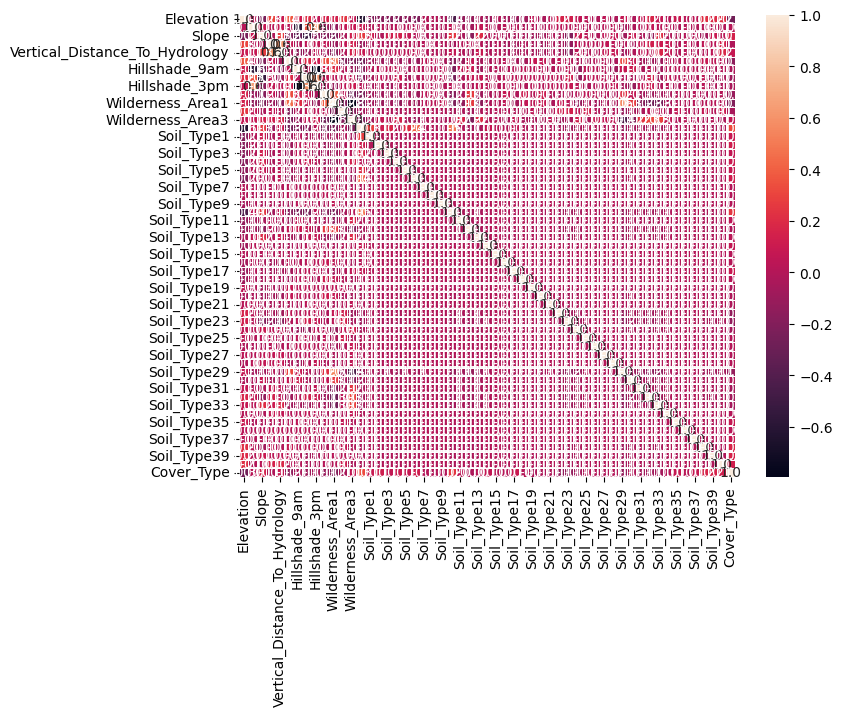

In [100]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,
            linewidths=0.5, fmt='0.1f', ax=ax)
plt.show()

Checking out for pearson score correlation from each features. From the correlation we can see that horizontal_distance_to_hidrology and vertical_distance_to hidrology has an important correlation with 60% scores. Then for aspcet and hillshade_3pm has an important correlation with 60% scores. between "Hillshade Noon" and "Hillshade 3pm" with 60% scores. Between "Elevation" and "Horizontal Distance To Roadways" with 40%.   

Text(0, 0.5, 'Horizontal Distance')

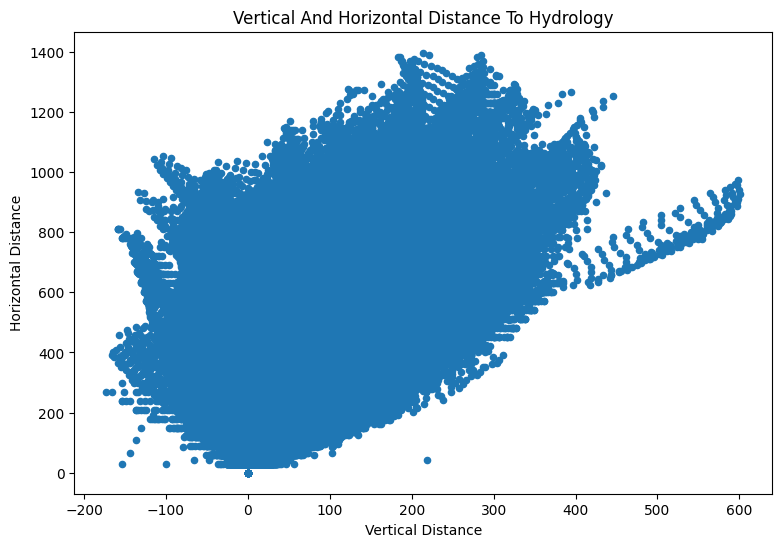

In [101]:
# Visualizing the correlation between vertical and horizontal distance to hidrology columns
df.plot(kind='scatter', x='Vertical_Distance_To_Hydrology', 
              y='Horizontal_Distance_To_Hydrology',figsize = (9,6))

plt.title('Vertical And Horizontal Distance To Hydrology')
plt.xlabel("Vertical Distance")
plt.ylabel("Horizontal Distance")

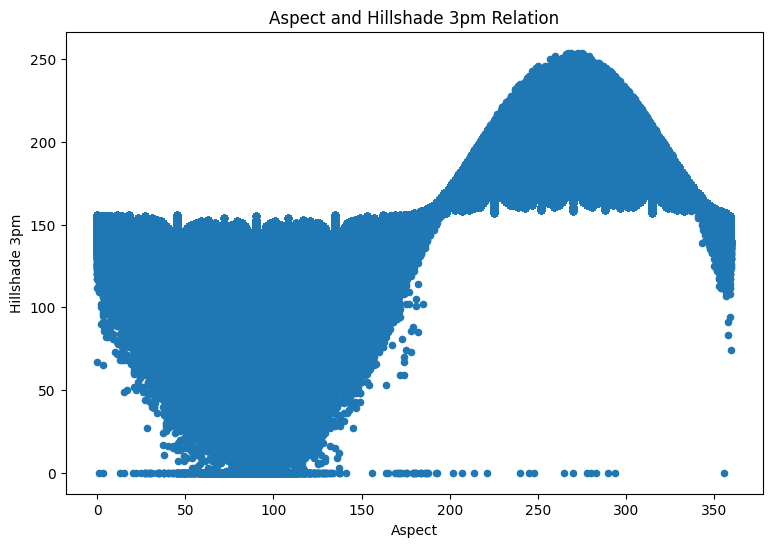

In [102]:
df.plot(kind='scatter', x='Aspect', y='Hillshade_3pm',figsize = (9,6))

plt.title('Aspect and Hillshade 3pm Relation')
plt.xlabel("Aspect")
plt.ylabel("Hillshade 3pm")

plt.show()

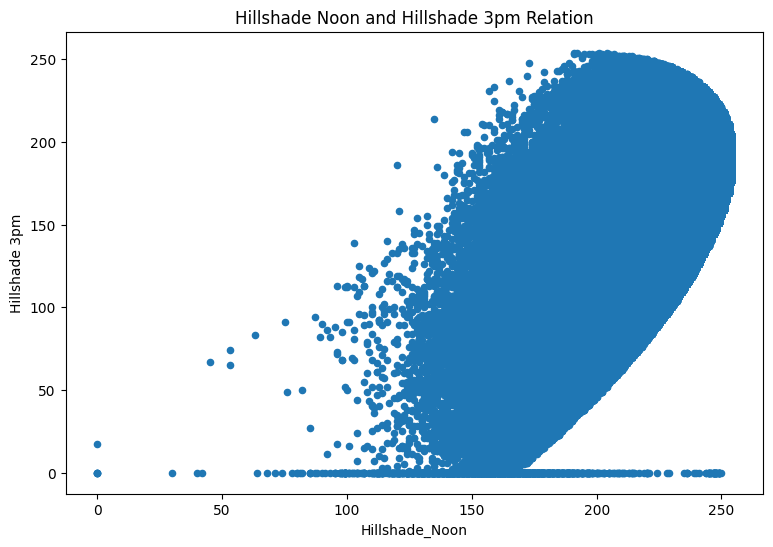

In [103]:
df.plot(kind='scatter', x='Hillshade_Noon', y='Hillshade_3pm',figsize = (9,6))

plt.title('Hillshade Noon and Hillshade 3pm Relation')
plt.xlabel("Hillshade_Noon")
plt.ylabel("Hillshade 3pm")

plt.show()

The clearly insight from those visualization is, we can see there are found an outlier for each features.

In [104]:
# defining the outlier with boxplot visualization
autocorr1 = df[['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology']]
autocorr2 = df[['Aspect','Hillshade_3pm']]
autocorr3 = df[['Hillshade_Noon','Hillshade_3pm']]

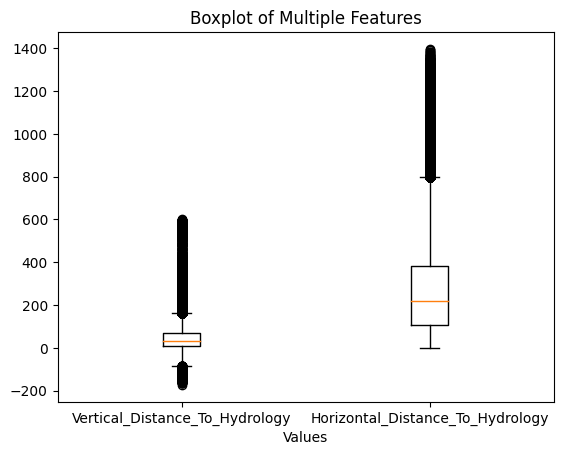

In [105]:
fig, ax = plt.subplots()
ax.boxplot(autocorr1)
ax.set_xticklabels(autocorr1.keys())
ax.set_xlabel('Values')
ax.set_title('Boxplot of Multiple Features')


plt.show()

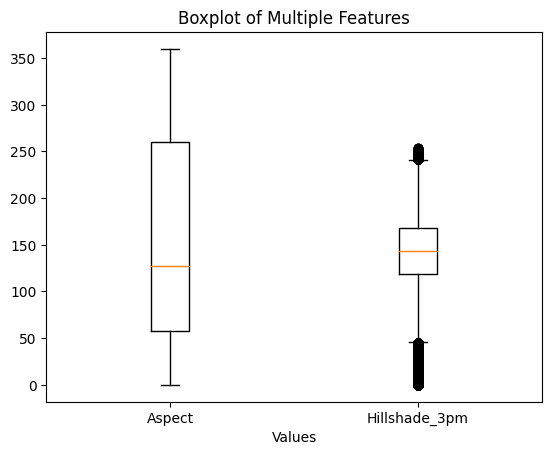

In [106]:
fig, ax = plt.subplots()
ax.boxplot(autocorr2)
ax.set_xticklabels(autocorr2.keys())
ax.set_xlabel('Values')
ax.set_title('Boxplot of Multiple Features')


plt.show()

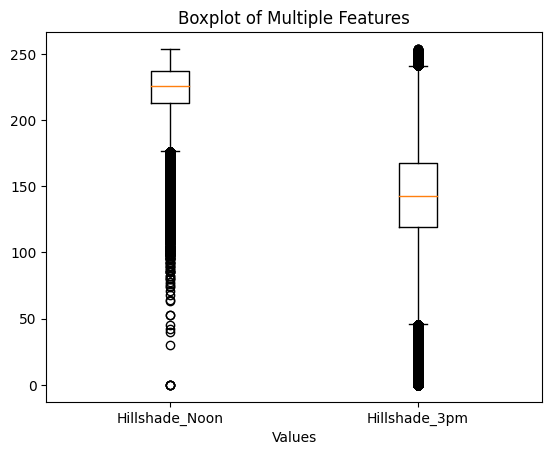

In [107]:
fig, ax = plt.subplots()
ax.boxplot(autocorr3)
ax.set_xticklabels(autocorr3.keys())
ax.set_xlabel('Values')
ax.set_title('Boxplot of Multiple Features')


plt.show()

Boxplot visualization with an autocorrelation feature

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

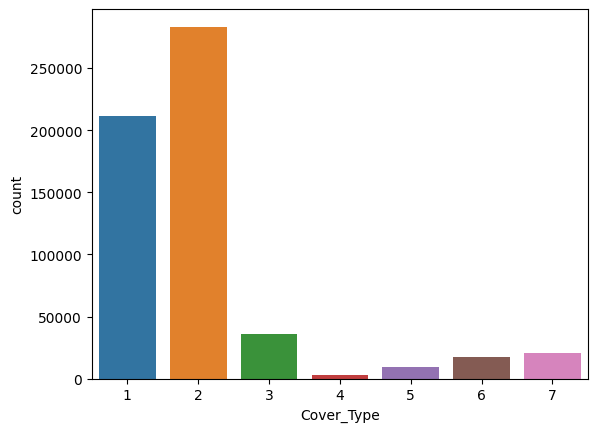

In [108]:
sns.countplot(data=df, x='Cover_Type')

From this we know that there are many class imbalanced. It should handled for better performance.

### Feature Engineering

#### Split between X (features) and y (Target)

In [109]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [110]:
X = df.drop(['Cover_Type'],axis=1)
y = df['Cover_Type']
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


#### Splitting Numerical and Categorical Columns on Features

In [111]:
num_col = X.describe().columns.tolist()
cat_col = X.select_dtypes(include=['category']).columns.tolist()
num_col

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

#### Splitting Train and Test 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (464809, 54)
Test Size : (116203, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
261834,3171,179,20,270,48,2758,223,248,147,3194,...,0,0,0,0,0,0,0,0,0,0
549114,3067,203,26,0,0,3396,198,252,176,792,...,0,0,1,0,0,0,0,0,0,0
7085,3382,335,4,162,23,3445,211,234,162,2259,...,0,0,0,0,1,0,0,0,0,0
436844,3067,243,9,150,16,2813,203,247,182,641,...,0,0,0,0,0,0,0,0,0,0
177145,2720,59,19,162,41,175,230,196,90,1852,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28755,2837,199,18,256,36,3502,211,253,170,6359,...,0,0,0,0,0,0,0,0,0,0
552821,3374,132,13,270,45,933,240,233,121,4121,...,0,0,0,0,0,0,0,1,0,0
126666,3142,78,7,60,3,2976,229,228,132,3467,...,0,0,0,0,0,0,0,0,0,0
213959,3212,304,9,67,9,4674,196,236,179,420,...,0,0,0,0,0,0,0,1,0,0


#### Handling Outlier

In [113]:
X_train_eda = X_train.copy()

In [114]:
# check skewness
for i in X_train_eda[num_col].columns:
    print(i, ': ', X_train_eda[num_col][i].skew())

Elevation :  -0.8167309078533231
Aspect :  0.4004563563106012
Slope :  0.7863752865534634
Horizontal_Distance_To_Hydrology :  1.1415899357333406
Vertical_Distance_To_Hydrology :  1.7926596965364259
Horizontal_Distance_To_Roadways :  0.7123735757868357
Hillshade_9am :  -1.1779291449345926
Hillshade_Noon :  -1.061285113389843
Hillshade_3pm :  -0.27790919460359
Horizontal_Distance_To_Fire_Points :  1.2898605666164753
Wilderness_Area1 :  0.20662855204309513
Wilderness_Area2 :  4.0653116663891895
Wilderness_Area3 :  0.25697499157895287
Wilderness_Area4 :  3.5713792780575577
Soil_Type1 :  13.74185160146416
Soil_Type2 :  8.64677820271191
Soil_Type3 :  10.776359439919213
Soil_Type4 :  6.635107476027813
Soil_Type5 :  18.99974226763381
Soil_Type6 :  9.21290699633553
Soil_Type7 :  74.81406777978818
Soil_Type8 :  55.82601477429967
Soil_Type9 :  22.47205397671956
Soil_Type10 :  3.852076946495955
Soil_Type11 :  6.610885245260049
Soil_Type12 :  4.047004311186997
Soil_Type13 :  5.522842908852765
Soil_

In [115]:
# check outlier
winsor = Winsorizer(capping_method='iqr', fold=1.5, tail='both')
X_train_clean = winsor.fit_transform(X_train_eda[num_col])

In [116]:
# check skewness
for i in X_train_clean[num_col].columns:
    print(i, ': ', X_train_clean[num_col][i].skew())

Elevation :  -0.6301212217527725
Aspect :  0.4004563563106012
Slope :  0.5690906205730897
Horizontal_Distance_To_Hydrology :  0.8502438864728623
Vertical_Distance_To_Hydrology :  0.905627472747519
Horizontal_Distance_To_Roadways :  0.7106728886684175
Hillshade_9am :  -0.7845118472931499
Hillshade_Noon :  -0.6173382726078
Hillshade_3pm :  -0.14153417899806942
Horizontal_Distance_To_Fire_Points :  0.8787820721617565
Wilderness_Area1 :  0.20662855204309513
Wilderness_Area2 :  0
Wilderness_Area3 :  0.25697499157895287
Wilderness_Area4 :  0
Soil_Type1 :  0
Soil_Type2 :  0
Soil_Type3 :  0
Soil_Type4 :  0
Soil_Type5 :  0
Soil_Type6 :  0
Soil_Type7 :  0
Soil_Type8 :  0
Soil_Type9 :  0
Soil_Type10 :  0
Soil_Type11 :  0
Soil_Type12 :  0
Soil_Type13 :  0
Soil_Type14 :  0
Soil_Type15 :  0
Soil_Type16 :  0
Soil_Type17 :  0
Soil_Type18 :  0
Soil_Type19 :  0
Soil_Type20 :  0
Soil_Type21 :  0
Soil_Type22 :  0
Soil_Type23 :  0
Soil_Type24 :  0
Soil_Type25 :  0
Soil_Type26 :  0
Soil_Type27 :  0
Soil_Typ

#### Scaling

In [117]:
scaler = MinMaxScaler()

X_train_clean[num_col] = scaler.fit_transform(X_train_clean[num_col])
X_train_clean

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
261834,0.629930,0.497222,0.634921,0.338346,0.540323,0.413586,0.706161,0.922078,0.517857,0.660054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549114,0.556690,0.563889,0.825397,0.000000,0.346774,0.509260,0.469194,0.974026,0.665816,0.163670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7085,0.778521,0.930556,0.126984,0.203008,0.439516,0.516608,0.592417,0.740260,0.594388,0.466832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436844,0.556690,0.675000,0.285714,0.187970,0.411290,0.421834,0.516588,0.909091,0.696429,0.132465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177145,0.312324,0.163889,0.603175,0.203008,0.512097,0.026243,0.772512,0.246753,0.227041,0.382724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28755,0.394718,0.552778,0.571429,0.320802,0.491935,0.525156,0.592417,0.987013,0.635204,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552821,0.772887,0.366667,0.412698,0.338346,0.528226,0.139912,0.867299,0.727273,0.385204,0.851622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126666,0.609507,0.216667,0.222222,0.075188,0.358871,0.446277,0.763033,0.662338,0.441327,0.716470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213959,0.658803,0.844444,0.285714,0.083960,0.383065,0.700907,0.450237,0.766234,0.681122,0.086795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
encoder = OrdinalEncoder()

cat_enc = encoder.fit_transform(X_train_eda[cat_col])
cat_enc


array([], shape=(464809, 0), dtype=float64)

In [119]:
X_train_eda[cat_col] = cat_enc

In [120]:
X_train_cat = X_train_eda[cat_col].reset_index(drop=True)

In [121]:
X_train_final = pd.concat([X_train_clean.reset_index(drop=True), X_train_cat],axis=1)

#### Handling Imbalance

In [122]:
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='auto').fit_resample(X_train_final, y_train) # Minority Class will have same the same number as the majority class
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train_final.columns)
y_train_resampled.value_counts()

2    226640
7    226640
1    226640
5    226640
3    226640
4    226640
6    226640
Name: Cover_Type, dtype: int64

In [123]:
# df_train_final = pd.concat([X_train_clean.reset_index(drop=True), X_train_cat, y_train.reset_index(drop=True)], axis=1)
# df_train_final.shape

In [124]:
# df_train_final.head()

In [125]:
# pearson correlation for x_train_final

# fig,ax = plt.subplots(figsize=[20,10])

# corr = df_train_final.corr()

# ax = sns.heatmap(corr,annot=True)
# plt.show()

#### Pipeline Preprocess

In [126]:
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
        ('scaler', MinMaxScaler())
])

In [127]:
num_tr = num_pipe.fit_transform(X_train[num_col])
num_tr

array([[0.62992958, 0.49722222, 0.63492063, ..., 0.        , 0.        ,
        0.        ],
       [0.55669014, 0.56388889, 0.82539683, ..., 0.        , 0.        ,
        0.        ],
       [0.77852113, 0.93055556, 0.12698413, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60950704, 0.21666667, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.65880282, 0.84444444, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.67007042, 0.15      , 0.19047619, ..., 0.        , 0.        ,
        0.        ]])

In [128]:
cat_pipe = Pipeline([
        ('encoder', OrdinalEncoder())
])

In [129]:
cat_tr = cat_pipe.fit_transform(X_train[cat_col])
cat_tr

array([], shape=(464809, 0), dtype=float64)

In [130]:
preprocess = ColumnTransformer([
        ('numerical', num_pipe, num_col),
        ('categorical', cat_pipe, cat_col)
])
X_train_pipe = preprocess.fit_transform(X_train)

In [131]:
X_train_pipe

array([[0.62992958, 0.49722222, 0.63492063, ..., 0.        , 0.        ,
        0.        ],
       [0.55669014, 0.56388889, 0.82539683, ..., 0.        , 0.        ,
        0.        ],
       [0.77852113, 0.93055556, 0.12698413, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60950704, 0.21666667, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.65880282, 0.84444444, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.67007042, 0.15      , 0.19047619, ..., 0.        , 0.        ,
        0.        ]])

In [132]:
X_test_pipe = preprocess.fit_transform(X_test)
X_test_pipe

array([[0.65809859, 0.53333333, 0.31746032, ..., 0.        , 0.        ,
        0.        ],
       [0.23838028, 0.48888889, 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.25105634, 0.88055556, 0.34920635, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67922535, 0.40277778, 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [0.63908451, 0.71388889, 0.41269841, ..., 0.        , 0.        ,
        0.        ],
       [0.47992958, 0.83611111, 0.31746032, ..., 0.        , 0.        ,
        0.        ]])

In [133]:
imbalanced_pipe = imbpipe([
            ('preprocess', preprocess),
            ('over_sampl', SMOTE(sampling_strategy='auto', random_state=42))
])

#### Model Definition

In [134]:
rf = RandomForestClassifier(random_state=42)

/opt/anaconda3/envs/galih/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


train :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    226640
           2       1.00      1.00      1.00    226640
           3       1.00      1.00      1.00    226640
           4       1.00      1.00      1.00    226640
           5       1.00      1.00      1.00    226640
           6       1.00      1.00      1.00    226640
           7       1.00      1.00      1.00    226640

    accuracy                           1.00   1586480
   macro avg       1.00      1.00      1.00   1586480
weighted avg       1.00      1.00      1.00   1586480

test :
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     42368
           2       0.95      0.94      0.94     56661
           3       0.90      0.93      0.92      7151
           4       0.71      0.88      0.79       549
           5       0.80      0.89      0.84      1899
           6       0.82      0.89      0.86      3473
         

/opt/anaconda3/envs/galih/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Confusion Matrix      : 


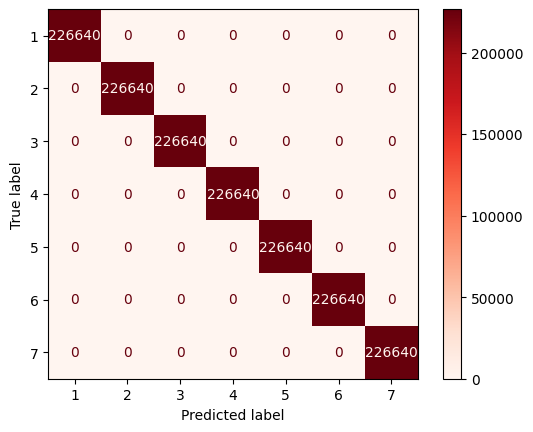

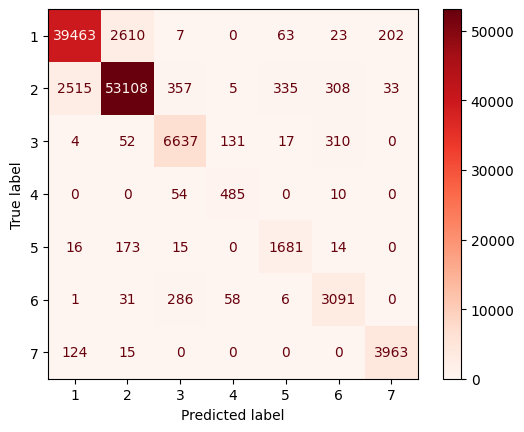

In [135]:
rf.fit(X_train_resampled, y_train_resampled)

rf_train = rf.predict(X_train_resampled)
rf_test = rf.predict(X_test_pipe)
print('train :')
print(classification_report(y_train_resampled, rf_train))
print(100*'=')
print('test :')
print(classification_report(y_test,rf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_resampled, y_train_resampled, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_pipe, y_test, cmap='Reds'))

#### Final Pipeline

In [136]:
final_pipe = imbpipe([
            ('preprocess', preprocess),
            ('over_sampling', SMOTE(sampling_strategy='auto', random_state=42)),
            ('model_rf', rf)
])

final_pipe.fit(X_train,y_train)
final_pipe.predict(X_train)

array([2, 2, 7, ..., 1, 1, 1])

#### Saving Model 

In [138]:
# import pickle

# with open('model.pkl','wb') as file_1:
#     pickle.dump(rf, file_1)
